# Comparison of computation speeds between homogenous density tesseroid with variable density tesseroid

**Import Packages**

In [1]:
from __future__ import division
import time
import numpy as np
from fatiando import gridder
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['axes.labelsize'] = 9.0 # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 9.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.usetex'] = True # use latex for all text handling
plt.rcParams['text.color'] = '3a3a3a'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = '3a3a3a'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2

In [3]:
def density_linear(h):
    return -(3300-2670)/35000.*h - 2670

homogeneous = Tesseroid(-10, 10, -10, -10, 0, -50000, props={'density': 100})
variable = Tesseroid(-10, 10, -10, -10, 0, -50000, props={'density': density_linear})

In [17]:
import timeit

lon, lat = np.array([0.]), np.array([0.])
#heights = [2e3, 10e3, 50e3, 260e3]
heights = [2e3]

for height in heights:
    h = np.array([height])
    t = timeit.repeat('tesseroid.potential(lon, lat, h, [homogeneous])',
                      'from __main__ import tesseroid, lon, lat, h, homogeneous',
                      number=1, repeat=100)
    print t

[0.00010013580322265625, 6.008148193359375e-05, 9.298324584960938e-05, 5.602836608886719e-05, 6.198883056640625e-05, 4.38690185546875e-05, 4.38690185546875e-05, 4.410743713378906e-05, 4.410743713378906e-05, 4.410743713378906e-05, 4.315376281738281e-05, 4.291534423828125e-05, 4.291534423828125e-05, 4.410743713378906e-05, 4.315376281738281e-05, 4.291534423828125e-05, 4.1961669921875e-05, 4.410743713378906e-05, 5.5789947509765625e-05, 4.410743713378906e-05, 4.38690185546875e-05, 4.38690185546875e-05, 4.291534423828125e-05, 4.410743713378906e-05, 4.315376281738281e-05, 4.38690185546875e-05, 4.291534423828125e-05, 4.291534423828125e-05, 4.315376281738281e-05, 4.291534423828125e-05, 4.38690185546875e-05, 4.410743713378906e-05, 4.410743713378906e-05, 4.291534423828125e-05, 4.410743713378906e-05, 4.291534423828125e-05, 4.482269287109375e-05, 4.220008850097656e-05, 4.506111145019531e-05, 4.315376281738281e-05, 4.696846008300781e-05, 4.1961669921875e-05, 4.8160552978515625e-05, 4.291534423828125

In [18]:
np.array(t).mean()

4.6415328979492189e-05

In [54]:
lon, lat = np.array([0.]), np.array([0.])
heights = [2e3, 10e3, 50e3, 260e3]
#heights = [2e3]

fields = 'potential gz gzz'.split()
times_homogeneous = {}
times_variable = {}
number_of_runs = 100

for field in fields:
    times_homogeneous[field] = []
    times_variable[field] = []
    for height in heights:
        h = np.array([height])
        
        times = []
        for i in range(number_of_runs):
            st = time.time()
            if i==0:
                %time result = getattr(tesseroid, field)(lon, lat, h, [homogeneous])
            else:
                result = getattr(tesseroid, field)(lon, lat, h, [homogeneous])
            times.append(time.time() - st)
        mean_time = np.mean(times)
        times_homogeneous[field].append(mean_time)
        
        times = []
        for i in range(number_of_runs):
            st = time.time()
            if i == 0:
                %time result = getattr(tesseroid, field)(lon, lat, h, [variable])
            else:
                result = getattr(tesseroid, field)(lon, lat, h, [variable])
            times.append(time.time() - st)
        mean_time = np.mean(times)
        times_variable[field].append(mean_time)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 122 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 93.9 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 103 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 113 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 113 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 101 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 99.9 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 85.1 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 115 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 134 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 86.1 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 92 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 98.9 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 171 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 115 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall t

In [50]:
print times_homogeneous
print times_variable

{'potential': [0.0018887543678283692], 'gzz': [0.0010703897476196289], 'gz': [0.00094624519348144535]}
{'potential': [0.0013394594192504884], 'gzz': [0.0013293099403381347], 'gz': [0.00091148853302001952]}


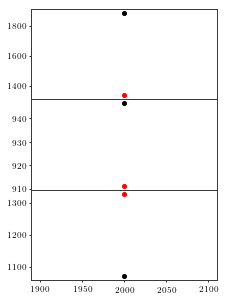

In [52]:
fields = 'potential gz gzz'.split()
fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)

for field, ax in zip(fields, axes):
    ax.plot(heights, np.array(times_homogeneous[field])*1e6, 'o-', color='k')
    ax.plot(heights, np.array(times_variable[field])*1e6, 'o-', color='r')

    
    #ax.set_yscale('log')
plt.show()